<b>Дана функция $x = x(t)$ в пространстве $L^2(-1; 1)$ со стандартным скалярным произведением. Для функции $x$ в этом пространстве требуется найти
 <li>многочлен наилучшего приближения первой степени;</li>
 <li>многочлен наилучшего приближения второй степени.</li>
Построить графики функции $x$ и полученных многочленов.</b>

$x(t) = \sqrt{1 - t^2}$

In [1]:
import sympy as sp
from IPython.display import display, Latex

sp.init_printing(use_latex='mathjax')

t = sp.Symbol('t')
x = sp.sqrt(1 - t**2)
a = -1
b = 1

display(Latex("Функция $x(t)$:"))
display(str(x))

display(Latex("А также нам понадобятся три первых нормированных многочлена Лежандра"))
legendre_polynomials = [1, t, t**2 - sp.Rational(1, 3)]
    
display(legendre_polynomials)

<IPython.core.display.Latex object>

'sqrt(-t**2 + 1)'

<IPython.core.display.Latex object>

⎡       2   1⎤
⎢1, t, t  - ─⎥
⎣           3⎦

Вычислим коэффициенты Фурье для функции $x(t)$.

In [2]:
import scipy.integrate as integrate

fourier_coefficients = []

fourier_coefficients.append(sp.integrate(x*legendre_polynomials[0], (t, a, b)))
fourier_coefficients.append(sp.integrate(x*legendre_polynomials[1], (t, a, b)))
# Последний коэффициент посчитаем численно
fourier_coefficients.append(integrate.quad(lambda z: x.subs(t, z)*legendre_polynomials[2].subs(t, z), a, b)[0])

display(Latex("Получаем следующие коэффициенты:"))
display(fourier_coefficients)

<IPython.core.display.Latex object>

⎡π                         ⎤
⎢─, 0, -0.13089969389966907⎥
⎣2                         ⎦

Найдем для функции $x(t)$ многочлены наилучшего прилижения первой и второй степени.

In [3]:
polynomial_of_best_approximation = []
polynomial_of_best_approximation.append(legendre_polynomials[0]*fourier_coefficients[0] + 
                                        legendre_polynomials[1]*fourier_coefficients[1])
polynomial_of_best_approximation.append(legendre_polynomials[0]*fourier_coefficients[0] +
                                        legendre_polynomials[1]*fourier_coefficients[1] + 
                                        legendre_polynomials[2]*fourier_coefficients[2])

display(Latex("Многочлен наилучшего приближения первой степени:"))
display(polynomial_of_best_approximation[0])

display(Latex("Многочлен наилучшего приближения второй степени:"))
display(polynomial_of_best_approximation[1])

<IPython.core.display.Latex object>

π
─
2

<IPython.core.display.Latex object>

                     2                        π
- 0.130899693899669⋅t  + 0.0436332312998897 + ─
                                              2

/usr/local/lib/python3.5/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """


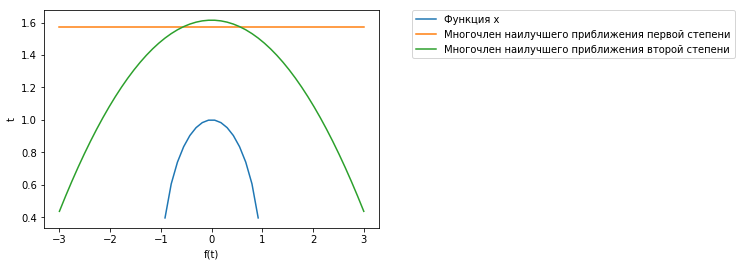

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def f(function, vals):
    return sp.lambdify(t, function)(vals)

def constant_f(val, vals):
    dd = lambda z: val
    return sp.lambdify(t, val)(vals)

t_values = np.linspace(-3, 3) 

plt.plot(t_values,
         f(x, t_values),
         label='Функция x')
plt.plot((-3, 3), (polynomial_of_best_approximation[0], polynomial_of_best_approximation[0]),
         label='Многочлен наилучшего приближения первой степени')
plt.plot(t_values, 
         f(polynomial_of_best_approximation[1], t_values),
         label='Многочлен наилучшего приближения второй степени')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
plt.ylabel('t')
plt.xlabel('f(t)')
plt.show()